In [ ]:
from google.colab import drive
drive.mount('/connect.drive')

Mounted at /connect.drive


In [ ]:
import pandas as pd
import numpy as np

# ***phương pháp F-test***

In [ ]:
# đánh giá mô hình sử dụng 4 đặc điểm được chọn bằng anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('/connect.drive/MyDrive/Chuyên đề 1/diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


# ***phương pháp thống kê tương quan***

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

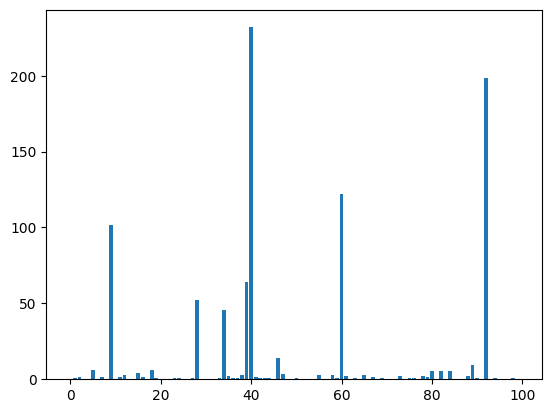

In [ ]:
#ví dụ về lựa chọn tính năng tương quan cho dữ liệu số
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# ***So sánh kết quả thực hiện mô hình phân lớp trước khi trích chọn đặc trưng, sau khi trích chọn bằng f-test và sau khi trích chọn bằng thống kê tương quan.***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Đọc dữ liệu
data = pd.read_csv("/connect.drive/MyDrive/Chuyên đề 1/diabetes.csv")

def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('/connect.drive/MyDrive/Chuyên đề 1/diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# ---------------------------
# Mô hình trước khi trích chọn
# ---------------------------
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
yhat_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, yhat_before)
print(f"Accuracy trước khi trích chọn: {accuracy_before}")

# ---------------------------
# Mô hình sau khi trích chọn bằng F-test
# ---------------------------
# Sử dụng F-test để chọn đặc trưng
f_selector = SelectKBest(score_func=f_classif, k=5)
X_train_fs_f_test = f_selector.fit_transform(X_train, y_train)
X_test_fs_f_test = f_selector.transform(X_test)

# Huấn luyện mô hình chỉ trên các đặc trưng được chọn
model_after_f_test = RandomForestClassifier(random_state=42)
model_after_f_test.fit(X_train_fs_f_test, y_train)
yhat_after_f_test = model_after_f_test.predict(X_test_fs_f_test)
accuracy_after_f_test = accuracy_score(y_test, yhat_after_f_test)
print(f"Accuracy sau khi trích chọn bằng F-test: {accuracy_after_f_test}")

# ---------------------------
# Mô hình sau khi trích chọn bằng thống kê tương quan
# ---------------------------
# Sử dụng thống kê tương quan để chọn đặc trưng
mi_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_fs_corr = mi_selector.fit_transform(X_train, y_train)
X_test_fs_corr = mi_selector.transform(X_test)

# Huấn luyện mô hình chỉ trên các đặc trưng được chọn
model_after_corr = RandomForestClassifier(random_state=42)
model_after_corr.fit(X_train_fs_corr, y_train)
yhat_after_corr = model_after_corr.predict(X_test_fs_corr)
accuracy_after_corr = accuracy_score(y_test, yhat_after_corr)
print(f"Accuracy sau khi trích chọn bằng thống kê tương quan: {accuracy_after_corr}")


Accuracy trước khi trích chọn: 0.7834645669291339
Accuracy sau khi trích chọn bằng F-test: 0.7874015748031497
Accuracy sau khi trích chọn bằng thống kê tương quan: 0.7874015748031497


# ***Vẽ 1 đồ thị so sánh độ chính xác***

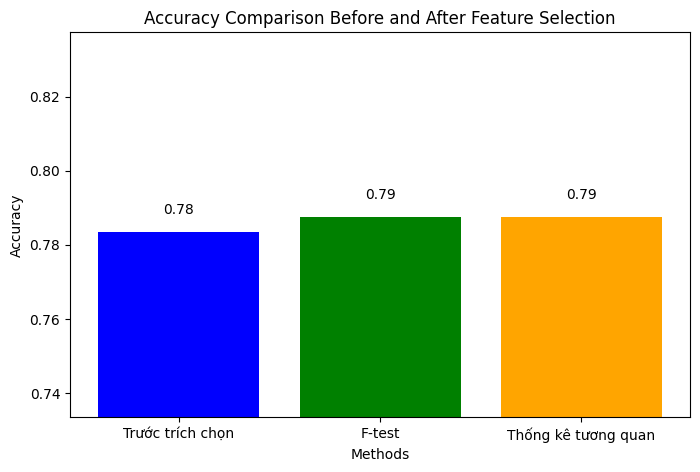

In [58]:
# Độ chính xác của mô hình trước và sau khi trích chọn đặc trưng
accuracies = [accuracy_before, accuracy_after_f_test, accuracy_after_corr]
methods = ["Trước trích chọn", "F-test", "Thống kê tương quan"]

# Vẽ đồ thị
plt.figure(figsize=(8, 5))
plt.bar(methods, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison Before and After Feature Selection')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)  # Điều chỉnh giới hạn trục y để chúng bằng nhau

# Hiển thị giá trị trên cột
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.005, f'{accuracies[i]:.2f}', ha='center')

plt.show()

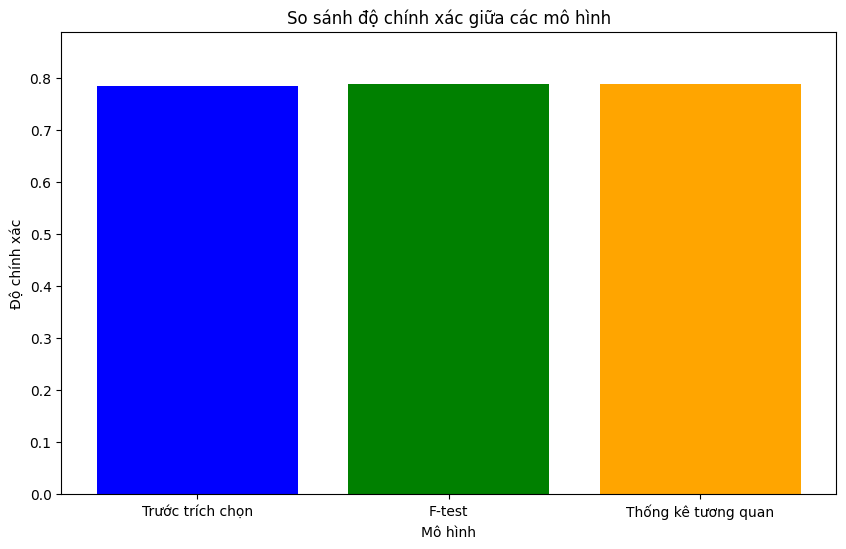

In [57]:
import matplotlib.pyplot as plt

# Danh sách các mô hình và độ chính xác tương ứng
models = ["Trước trích chọn", "F-test", "Thống kê tương quan"]
accuracies = [accuracy_before, accuracy_after_f_test, accuracy_after_corr]

# Vẽ đồ thị cột với tỷ lệ trục y tăng lên
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('So sánh độ chính xác giữa các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.ylim(0, max(accuracies) + 0.1)  # Đặt giới hạn trục y để tăng sự chênh lệch
plt.show()
